In [2]:
# C C a : complete case analysis 

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# cca --> complete conditional/case  analysis

# df --> missing data ---> filter missing data --->
# new df = filtered_columns_in which_we have_missing data

# new_df = missing data drop

# Archetecture---> Histogram ---> past column in which we have missing data
# updated column in which we have no missing data

# if past data architechture is overlap to new data architecture --> it means we can drop missing data
# if past data architure is not overlap to new data architture --> it means we can not  drop missing data . 

In [4]:
df = pd.read_csv("dsjob.csv")

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [25]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [26]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
199,no_enrollment,Graduate,5,1
1120,no_enrollment,Masters,11,2
1189,no_enrollment,Graduate,1,1
1163,Full time course,Graduate,<1,1
1370,no_enrollment,Masters,>20,1


In [27]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [28]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [29]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((2129, 13), (2018, 4))

In [30]:
import matplotlib.pyplot as plt

<Axes: >

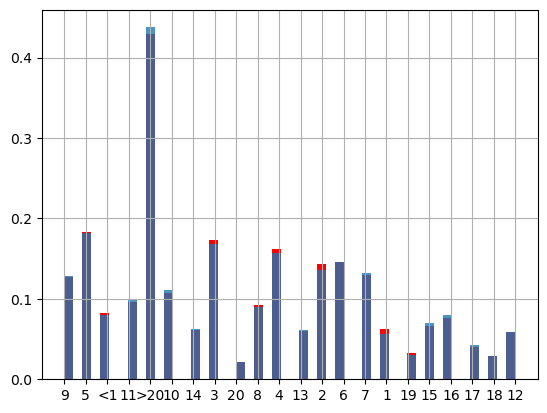

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data 
df['experience'].hist(bins = 50 , ax =ax , density = True , color = 'red')

# data after cca , the argument alpha makes the colur transparent , so we can see the overlay of the 2 dist
new_df['experience'].hist(bins = 50 , ax =ax , density = True , alpha = 0.8)


<Axes: >

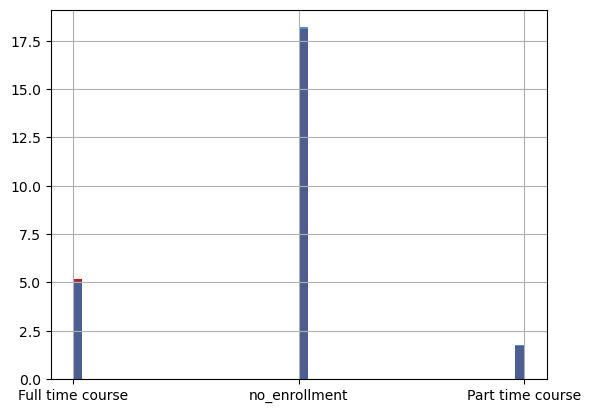

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data 
df['enrolled_university'].hist(bins = 50 , ax =ax , density = True , color = 'red')

# data after cca , the argument alpha makes the colur transparent , so we can see the overlay of the 2 dist
new_df_e_u['enrolled_university'].hist(bins = 50 , ax =ax , density = True , alpha = 0.8)


In [32]:
temp = pd.concat([
    # percent of obser per cat , org dat
    df['enrolled_university'].value_counts()/ len(df),

    # per of obser per cat , cca dat
    new_df['enrolled_university'].value_counts()/len(new_df)
],
axis = 1)

# add column names 
temp.columns = ['original' , 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


<Axes: >

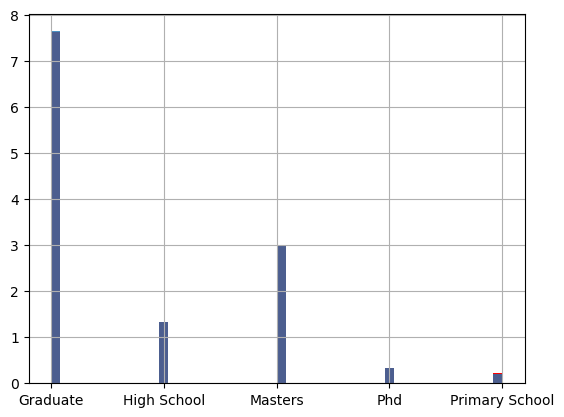

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data 
df['education_level'].hist(bins = 50 , ax =ax , density = True , color = 'red')

# data after cca , the argument alpha makes the colur transparent , so we can see the overlay of the 2 dist
new_df_e_u['education_level'].hist(bins = 50 , ax =ax , density = True , alpha = 0.8)


In [33]:
temp = pd.concat([
    # per of obser per cat , org dat
    df['education_level'].value_counts()/len(df),
    # per of obser per cat , cca dat
    new_df['education_level'].value_counts()/len(new_df)
    ], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353


<Axes: >

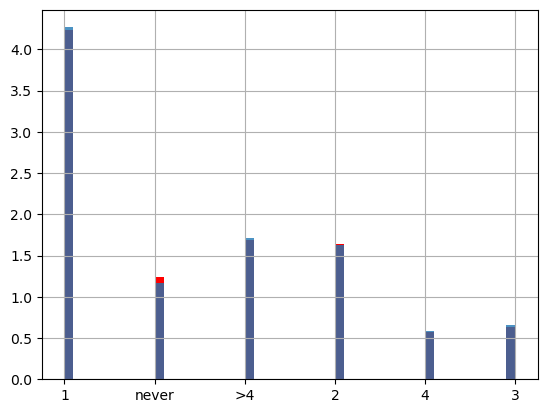

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data 
df['last_new_job'].hist(bins = 50 , ax =ax , density = True , color = 'red')

# data after cca , the argument alpha makes the colur transparent , so we can see the overlay of the 2 dist
new_df_e_u['last_new_job'].hist(bins = 50 , ax =ax , density = True , alpha = 0.8)


In [42]:
temp = pd.concat([
    # per of obser per cat , org dat
    df['last_new_job'].value_counts()/len(df),
    # per of obser per cat , cca dat
    new_df['last_new_job'].value_counts()/len(new_df)
    ], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
last_new_job,,
1,0.415218,0.426660
>4,0.165806,0.170961
2,0.160639,0.162537
never,0.121184,0.116452
3,0.062471,0.065411
4,0.055895,0.057978


In [ ]:
# apply on all of the columns 
# take the 25% of data 